# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

# Загрузка и первичный анализ данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.impute
import sklearn.preprocessing
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data=pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

In [3]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

<ipython-input-3-be4156809ec5>:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


In [4]:
# Первые 5 строк датасета
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 16719


In [6]:
# типы колонок
data.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [7]:
# размер набора данных
data.shape

(16719, 16)

# Обработка пропусков в данных

In [8]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [9]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((16719, 16), (16719, 6))

In [10]:
data_new_1.columns

Index(['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales'],
      dtype='object')

In [11]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((16719, 16), (6825, 16))

In [12]:
# Найдем пропуски в данных в процентном соотношении
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Name - 0%
Platform - 0%
Year_of_Release - 2%
Genre - 0%
Publisher - 0%
NA_Sales - 0%
EU_Sales - 0%
JP_Sales - 0%
Other_Sales - 0%
Global_Sales - 0%
Critic_Score - 51%
Critic_Count - 51%
User_Score - 40%
User_Count - 55%
Developer - 40%
Rating - 40%


In [13]:
data[data.columns].isnull()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
16715,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
16716,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
16717,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True


<AxesSubplot:>

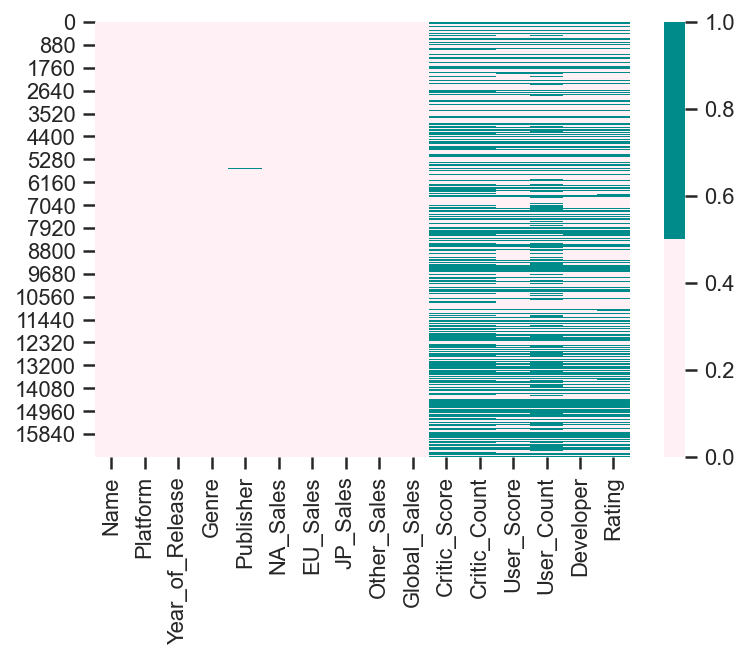

In [14]:
# Поработаем с заполнение пропусков в колонке "Year of release"
colors = ['#FFF0F5', '#008B8B']
sns.heatmap(data[data.columns].isnull(), cmap=sns.color_palette(colors))

/home/zeus/anaconda3/envs/tml_env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year_of_Release', ylabel='Density'>

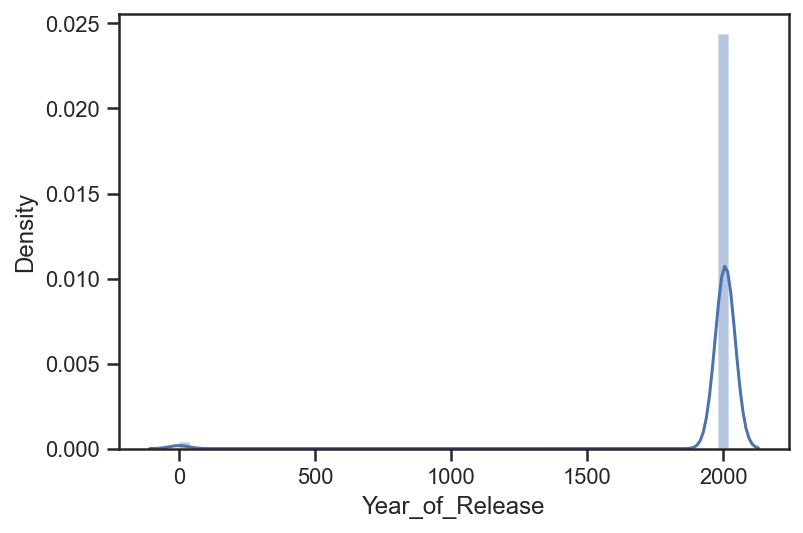

In [15]:
# Заполним пропуски в колонке нулями
sns.distplot(data['Year_of_Release'].fillna(0))

/home/zeus/anaconda3/envs/tml_env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

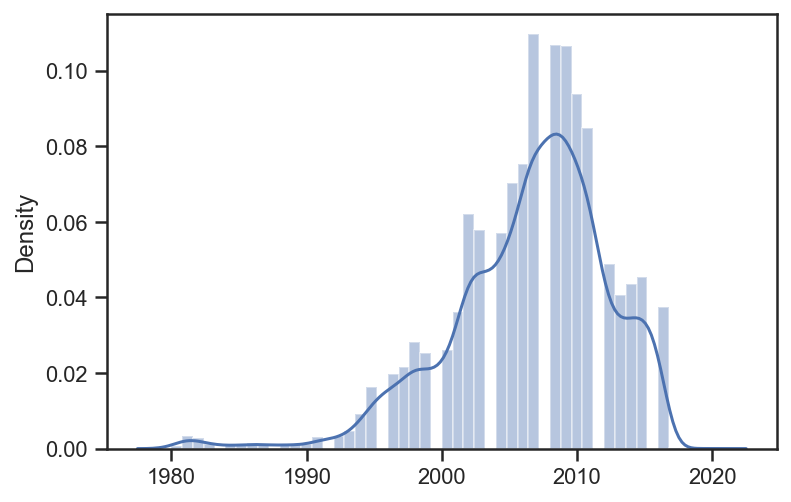

In [16]:
# Получаем совершенно не то, что нам нужно
# С помощью класса SimpleImputer можно проводить импьютацию различными показателями центра распределения
# Применим заполнение средними значениями
mean=sklearn.impute.SimpleImputer(strategy="mean") # Среднее значение
mean_rate=mean.fit_transform(data[['Year_of_Release']])
sns.distplot(mean_rate)

/home/zeus/anaconda3/envs/tml_env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

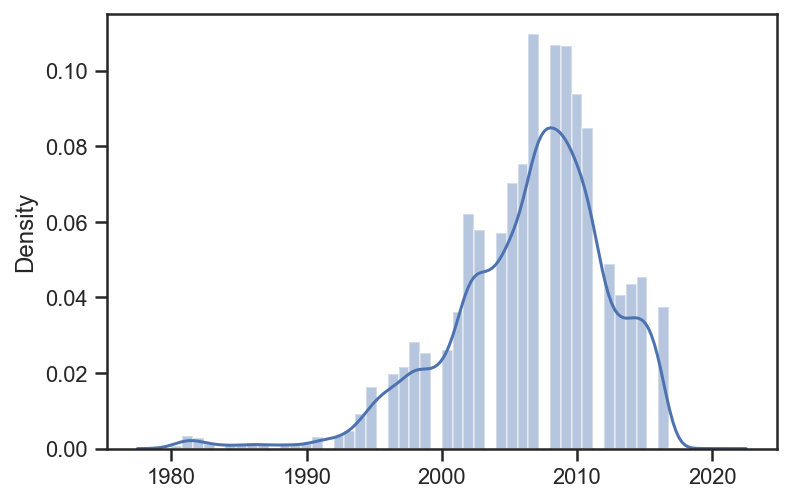

In [17]:
med=sklearn.impute.SimpleImputer(strategy="median") # Половина элементов больше медианы, половина меньше 
med_rate=med.fit_transform(data[['Year_of_Release']])
sns.distplot(med_rate)

/home/zeus/anaconda3/envs/tml_env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

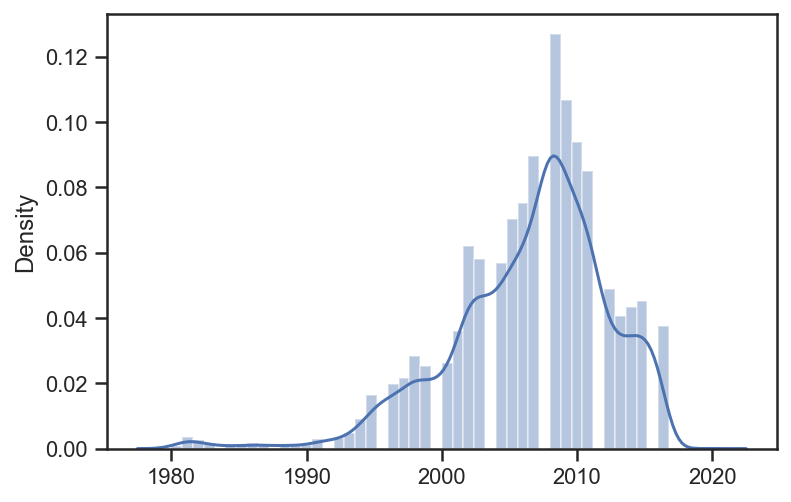

In [18]:
freq=sklearn.impute.SimpleImputer(strategy="most_frequent")
freq_rate=freq.fit_transform(data[['Year_of_Release']])
sns.distplot(freq_rate)

In [19]:
# Остановим выбор на средних значениях
data['Year_of_Release'] = mean_rate

**Обработка пропусков в категориальных данных**

In [20]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Name. Тип данных object. Количество пустых значений 2, 0.01%.
Колонка Genre. Тип данных object. Количество пустых значений 2, 0.01%.
Колонка Publisher. Тип данных object. Количество пустых значений 54, 0.32%.
Колонка User_Score. Тип данных object. Количество пустых значений 6704, 40.1%.
Колонка Developer. Тип данных object. Количество пустых значений 6623, 39.61%.
Колонка Rating. Тип данных object. Количество пустых значений 6769, 40.49%.


In [21]:
cat_temp_data = data[['Genre']]
cat_temp_data.head()

,Genre
0,Sports
1,Platform
2,Racing
3,Sports
4,Role-Playing


In [22]:
cat_temp_data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [23]:
cat_temp_data[cat_temp_data['Genre'].isnull()]

,Genre
659,NaN
14246,NaN


In [24]:
# Импьютация наиболее частыми значениями
imp2 = sklearn.impute.SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Sports'],
       ['Platform'],
       ['Racing'],
       ...,
       ['Adventure'],
       ['Platform'],
       ['Simulation']], dtype=object)

In [25]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [26]:
# Импьютация константой
imp3 = sklearn.impute.SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['Sports'],
       ['Platform'],
       ['Racing'],
       ...,
       ['Adventure'],
       ['Platform'],
       ['Simulation']], dtype=object)

In [27]:
np.unique(data_imp3)

array(['Action', 'Adventure', 'Fighting', 'Misc', 'NA', 'Platform',
       'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation',
       'Sports', 'Strategy'], dtype=object)

In [28]:
data_imp3[data_imp3=='NA'].size

2

In [29]:
data['Genre'] = data_imp2

In [30]:
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

# Кодирование категориальных признаков

In [31]:
types=data["Genre"]
types.value_counts()

Action          3372
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

**Кодирование категорий целочисленными значениями - label encoding**



In [32]:
le=sklearn.preprocessing.LabelEncoder()
type_le=le.fit_transform(types)
print(np.unique(type_le))
le.inverse_transform(np.unique(type_le))

[ 0  1  2  3  4  5  6  7  8  9 10 11]


array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

**Pandas get_dummies - быстрый вариант one-hot кодирования**

In [33]:
type_s=pd.get_dummies(types)
type_s.head(25)

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0,0,0


**Переходим  к масштабированию данных.**

Масштабирование предполагает изменение диапазона измерения величины, а нормализация - изменение распределения этой величины.

Если признаки лежат в различных диапазонах, то необходимо их нормализовать. Как правило, применяют два следующих подхода:


# MinMax масштабирование

In [34]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [35]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Year_of_Release']])

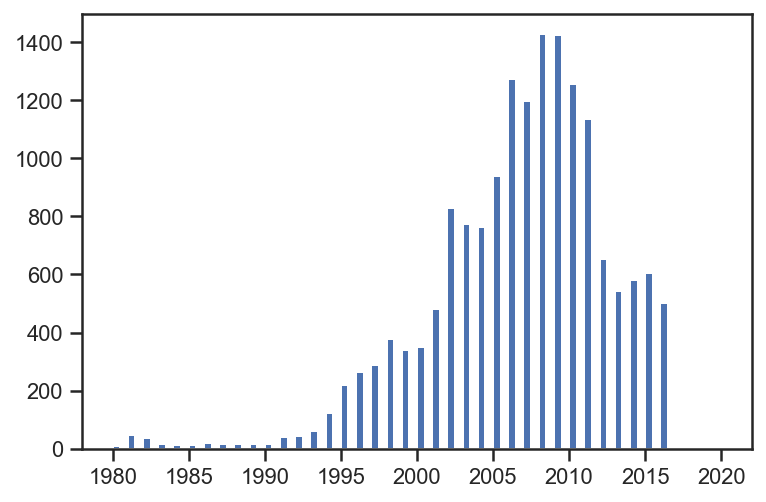

In [36]:
plt.hist(data['Year_of_Release'], 80)
plt.show()

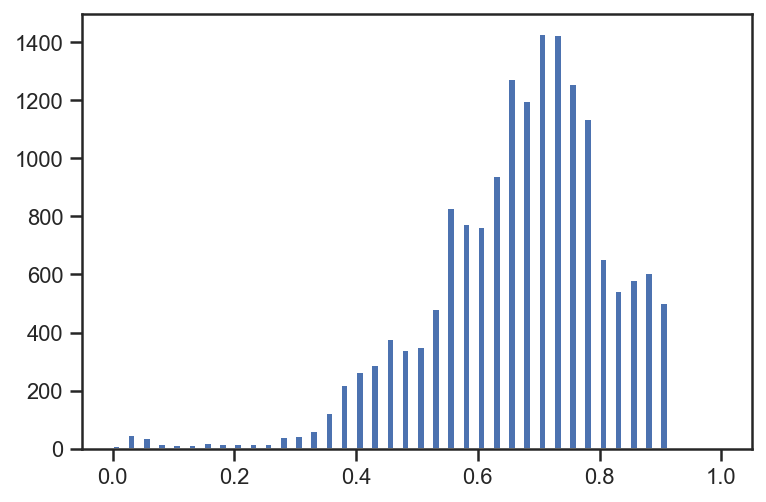

In [37]:
plt.hist(sc1_data, 80)
plt.show()

# Масштабирование данных на основе Z-оценки - StandardScaler

In [38]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Year_of_Release']])

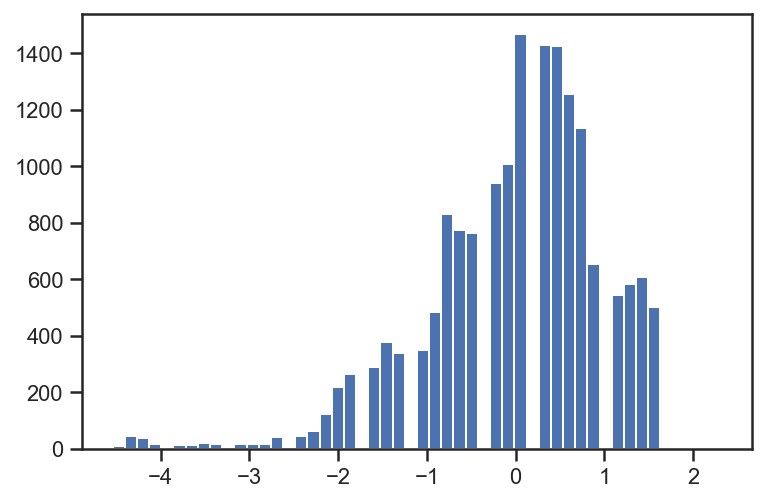

In [39]:
plt.hist(sc2_data, 50)
plt.show()